<a href="https://colab.research.google.com/github/hotmaths/Mod-le-math-matique-en-biologie/blob/master/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

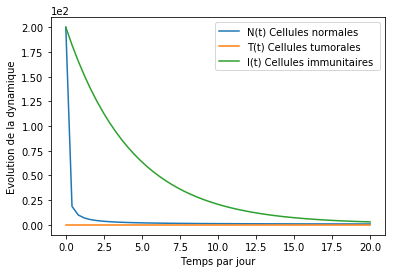

In [18]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 25 07:51:14 2019

@author: Jaouhari Mounir
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
###############################################################################
a1=0.1         #"Taux de croissance des $N$"
a2=0.011    #"Taux de croissance des $T$"
b1=0.121 #Taux d’épuisement
b2=0.21 #Taux de croissance des $T$
g1=0.231 #Taux de mortalité des $T$
g2=0.231 #Taux d’inactivation des $I$
e=1 #Effet de saturation
r=0.21 #Taux de reponseimmunitaire
m=0.231 #Taux de mortalité des $N$
d1=0.21 #Taux d’inhibition des
#d2=0.21
o=0.21 # Seuil immunitaire
s=0.251 #Source de production des $I$
#############################################################################
############################################################################
N=200
T=0
I=200
############################################################################

def diff(cancer, t):
  dNdt = cancer[0]*(a1 - b1*cancer[0]) - d1*cancer[1]*cancer[0]/(1 + e*cancer[1])
  dTdt = cancer[1]*(a2 - b2*cancer[1]) - a1*cancer[2]*cancer[1]
  dIdt = s + r*cancer[2]*cancer[1]/(o+cancer[1])-g2*cancer[2]*cancer[1]-m*cancer[2]
  #print (dNdt + dTdt + dIdt)
  dcancerdt=[dNdt, dTdt, dIdt]
  return dcancerdt
#####################################################################
cancer0 = (N, T, I)
t = np.linspace(0, 20)
cancer = odeint(diff, cancer0, t)
plt.plot(t, cancer[:, 0], label='N(t) Cellules normales ')
plt.plot(t, cancer[:, 1], label='T(t) Cellules tumorales')
plt.plot(t, cancer[:, 2], label='I(t) Cellules immunitaires ')

plt.legend()

plt.xlabel('Temps par jour')
plt.ylabel('Evolution de la dynamique')

# use scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()